# **Data Generation**

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import yaml
import json
import sys
import os

### **Standardroutes** ###

In [2]:
# lists of cities, products and quantities
# 20 cities
cities = ['Trento', 'Verona', 'Rome', 'Milano', 'Venezia', 'Bergamo', 'Padova', 'Bologna', 'Bolzano', 'Firenze',
          'Pisa', 'Siena', 'Napoli', 'Palermo', 'Genova', 'Torino', 'Lecce', 'Monza', 'Modena', 'Udine']
# 20 products
products = ['Milk', 'Apples', 'Bananas', 'Bread', 'Cheese', 'Beer', 'Tomatoes', 'Pens', 'Butter', 'Honey',
           'Fish', 'Meat', 'Water', 'Tea', 'Chocolate', 'Yogurt', 'Pasta', 'Rice', 'Carrots', 'Potatoes']
# quantites from 2 to 30
min_quantity = 2
max_quantity = 30
quantities = list(np.arange(start=min_quantity, stop=max_quantity+1, step=1))

**Parameter description**
- **min_length**: minimun length of a standardroute
- **max_length**: maximum length of a standardroute
- **min_products**: minimum number of products per trip
- **max_products**: maximum number of products per trip

In [3]:
# run notebook to load functions fun_sroutes(), fun_aroutes() and show_route()
# to create standardroutes and actual routes and to visualize a route
%run "functions_data_generation.ipynb"

# define parameters
min_length = 3
max_length = 7
min_products = 3
max_products = 7

### EXECUTE FUNCTION ###
standardroutes = fun_sroutes(number_of_routes=20, prints=False)

Functions for data generation successfully loaded.


Processing: 100%|██████████| 20/20 [00:00<00:00, 4795.41iteration/s]

id:s1, route:
     {'from': 'Pisa', 'to': 'Palermo', 'merchandise': {'Beer': 14, 'Tomatoes': 26, 'Water': 20, 'Bananas': 3, 'Meat': 28}}
     {'from': 'Palermo', 'to': 'Modena', 'merchandise': {'Honey': 20, 'Tea': 6, 'Water': 12, 'Fish': 6}}
     {'from': 'Modena', 'to': 'Venezia', 'merchandise': {'Meat': 28, 'Tomatoes': 9, 'Water': 17, 'Pasta': 9, 'Beer': 19, 'Carrots': 14}}


id:s2, route:
     {'from': 'Verona', 'to': 'Napoli', 'merchandise': {'Chocolate': 3, 'Bread': 15, 'Honey': 17, 'Cheese': 28, 'Fish': 20, 'Bananas': 20}}
     {'from': 'Napoli', 'to': 'Padova', 'merchandise': {'Bread': 11, 'Butter': 18, 'Chocolate': 19, 'Tea': 8, 'Rice': 8, 'Milk': 15}}
     {'from': 'Padova', 'to': 'Lecce', 'merchandise': {'Potatoes': 22, 'Yogurt': 12, 'Cheese': 23}}
     {'from': 'Lecce', 'to': 'Genova', 'merchandise': {'Pens': 12, 'Tea': 15, 'Yogurt': 17, 'Fish': 9, 'Beer': 2, 'Chocolate': 26, 'Cheese': 18}}
     {'from': 'Genova', 'to': 'Udine', 'merchandise': {'Apples': 7, 'Pasta': 30, 'Tom

### **Drivers** ###
##### **possible attributes:**
- likes short / long routes (cuts or adds cities)
- likes a city / dislikes a city (cuts or adds specific cities)
- likes many products / few products (cuts or adds products)
- likes a product / dislikes a product (cuts or adds specific products)
- likes high quantities / low quantites (increases or decreases quantities)

##### **Driver descriptions**

- **Driver A**: with attributes *['likes short routes', 'likes few products']*; he prefers routes with max. 4 trips and max. 4 products per trip.<br><br>
- **Driver B**: with attributes *['likes long routes', 'likes high quantities']*; he prefers routes with min. 5 trips and overall quantities of min. 15.<br><br>
- **Driver C**: with attributes *['likes a city', 'dislikes a product']*; he prefers routes which contain the cities ['Trento', 'Verona'], but no trips with the products ['Water', 'Milk', 'Fish'] or at least max. quantity of 12 of these disliked products.<br><br>
- **Driver D**: with attributes *['dislikes a city', 'likes low quantities']*; he prefers routes without the cities ['Milano', 'Venezia', 'Lecce'] and overall quantities of max. 15.<br><br>
- **Driver E**: with attributes *['likes a city', 'likes few products']*; he prefers routes which contain the cities ['Rome', 'Padua'], but max. 4 products per trip.<br><br>
- **Driver F**: with attributes *['likes short routes', 'likes many products']*; he prefers routes with max. 4 trips and trips with min. 5 products per trip.<br><br>
- **Driver G**: with attributes *['likes short routes', 'likes a product']*; he prefers routes with max. 4 trips and trips that contain the products ['Beer', 'Cheese'] or at least min. quantity of 18 of these liked products.<br><br>
- **Driver H**: with attributes *['dislikes a city', 'dislikes a product']*; he prefers routes without the cities ['Lecce', 'Palermo', 'Udine'] and no trips with the products ['Bananas', 'Bread', 'Tomatoes'] or at least max. quantity of 12 of these disliked products.<br><br>
- **Driver I**: with attributes *['likes a product', 'likes high quantities']*; he prefers routes with trips that contain the products ['Chocolate', 'Honey'] or at least min. quantity of 18 of these liked products and overall quantities of min. 15.<br><br>
- **Driver J**: with attributes *['likes long routes', 'likes low quantities']*; he prefers routes with min. 5 trips, but overall quantities of max. 15.<br><br>

In [4]:
# create a character for each driver with his preferences
drivers = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
attributes = ['likes short routes', 'likes long routes',
             'likes a city', 'dislikes a city',
             'likes few products', 'likes many products',
             'likes a product', 'dislikes a product',
             'likes high quantities', 'likes low quantities']

data = np.where(np.identity(n=10, dtype=int)==1, 'Yes', '-')
df_drivers_attributes = pd.DataFrame(data=data, index=['driver_' + driver for driver in drivers], columns=attributes)
df_drivers_attributes.loc['driver_A', 'likes low quantities'] = 'Yes'
df_drivers_attributes.loc['driver_B', 'likes many products'] = 'Yes'
df_drivers_attributes.loc['driver_C', 'dislikes a product'] = 'Yes'
df_drivers_attributes.loc['driver_D', 'likes low quantities'] = 'Yes'
df_drivers_attributes.loc['driver_D', 'likes a city'] = 'Yes'
df_drivers_attributes.loc['driver_E', 'likes long routes'] = 'Yes'
df_drivers_attributes.loc['driver_F', 'likes short routes'] = 'Yes'
df_drivers_attributes.loc['driver_G', 'likes short routes'] = 'Yes'
df_drivers_attributes.loc['driver_H', 'dislikes a city'] = 'Yes'
df_drivers_attributes.loc['driver_H', 'likes many products'] = 'Yes'
df_drivers_attributes.loc['driver_I', 'likes a product'] = 'Yes'
df_drivers_attributes.loc['driver_J', 'likes short routes'] = 'Yes'
display(df_drivers_attributes)

# define dictionarys with more specific information about what drivers like and dislike
driver_products = {'driver_C': ['Water'], #dislike
                   'driver_G': ['Beer', 'Cheese'], #like
                   'driver_H': ['Milk', 'Water'], #dislike
                   'driver_I': ['Chocolate', 'Honey']} #like

driver_cities = {'driver_C': ['Trento', 'Padova'], #like
                 'driver_D': ['Milano', 'Palermo', 'Lecce'], #dislike
                 'driver_E': ['Rome', 'Trento'], #like
                 'driver_H': ['Lecce', 'Palermo']} #dislike

,likes short routes,likes long routes,likes a city,dislikes a city,likes few products,likes many products,likes a product,dislikes a product,likes high quantities,likes low quantities
driver_A,Yes,-,-,-,-,-,-,-,-,Yes
driver_B,-,Yes,-,-,-,Yes,-,-,-,-
driver_C,-,-,Yes,-,-,-,-,Yes,-,-
driver_D,-,-,Yes,Yes,-,-,-,-,-,Yes
driver_E,-,Yes,-,-,Yes,-,-,-,-,-
driver_F,Yes,-,-,-,-,Yes,-,-,-,-
driver_G,Yes,-,-,-,-,-,Yes,-,-,-
driver_H,-,-,-,Yes,-,Yes,-,Yes,-,-
driver_I,-,-,-,-,-,-,Yes,-,Yes,-
driver_J,Yes,-,-,-,-,-,-,-,-,Yes


### **Actual Routes** ###

In [5]:
# define how many actual routes should be created for each standardroute
if (len(standardroutes) == 20): jobs_per_route = 5000 #for 20 sr and 100000 ar
else: jobs_per_route = 1000 #for 100 sr and 100000 ar

# calculate the total amount of actual routes
number_of_actual_routes = jobs_per_route * len(standardroutes)
print('Number of actual routes: {}\n'.format(number_of_actual_routes))

show_route(standardroutes[0])

Number of actual routes: 100000

id:s1, route:
     {'from': 'Pisa', 'to': 'Palermo', 'merchandise': {'Beer': 14, 'Tomatoes': 26, 'Water': 20, 'Bananas': 3, 'Meat': 28}}
     {'from': 'Palermo', 'to': 'Modena', 'merchandise': {'Honey': 20, 'Tea': 6, 'Water': 12, 'Fish': 6}}
     {'from': 'Modena', 'to': 'Venezia', 'merchandise': {'Meat': 28, 'Tomatoes': 9, 'Water': 17, 'Pasta': 9, 'Beer': 19, 'Carrots': 14}}




**Define parameters**
- **min_l**: minimum route length for a driver who likes long routes
- **max_l**: maximum route length for a driver who likes short routes
- **min_p**: minimum products per trip for a driver who likes many products per trip
- **max_p**: maximum products per trip for a driver who likes few products per trip
- **min_q**: minimum quantity if a driver likes a product
- **max_q**: maximum quantity if a driver dislikes aproduct
- **q_threshold**: miniumum/maximum quantity if a driver likes high/low quantities
- **prandom_p**: parameter of randomness (decides with what probability a driver increases/decreases overall quantities if he likes high/low quantities)
- **extra_random_p**: parameter of extra randomness (added to the parameter of randomness to decide if a driver increases/decreases the quantites of liked/disliked products)
<br><br>
- **input_sr**: standardroutes, which are used to create the actual routes
- **driver_givern**: select a specific driver (for debugging and evaluation of problem 2 and 3); default = False
- **prints**: settings for printing the output or not; options=(True, False); default = True
-**bar**: show the progress bar after finishing all iterations; default = True
- **ar_count**: counts the actual routes; default = 0

In [6]:
# define parameters
min_l = 6
max_l = 4
min_p = 6
max_p = 4
min_q = 20
max_q = 10
q_threshold = 15
random_p = 0.7
extra_random_p = 0.15

### EXECUTE FUNCTION ###
actual_routes = fun_aroutes(input_sr=standardroutes, driver_given=False, debug=False, prints=False)

Processing:   0%|          | 0/20 [00:00<?, ?iteration/s]

Processing: 100%|██████████| 20/20 [03:21<00:00, 10.05s/iteration]


In [7]:
# compare first three actual routes with their standardroute (or only first actual route if only one was created)
for i in range(min(3, len(actual_routes))):
    print('\n\n------------------------------COMPARISON STANDARDROUTE VS ACTUAL ROUTE-----------------------------------')
    show_route(standardroutes[[route['id'] == actual_routes[i]['sroute'] for route in standardroutes].index(True)])
    print("Driver's attributes:", df_drivers_attributes.columns[df_drivers_attributes.loc['driver_' + actual_routes[i]['driver']] == 'Yes'].tolist())
    show_route(actual_routes[i])



------------------------------COMPARISON STANDARDROUTE VS ACTUAL ROUTE-----------------------------------
id:s1, route:
     {'from': 'Pisa', 'to': 'Palermo', 'merchandise': {'Beer': 14, 'Tomatoes': 26, 'Water': 20, 'Bananas': 3, 'Meat': 28}}
     {'from': 'Palermo', 'to': 'Modena', 'merchandise': {'Honey': 20, 'Tea': 6, 'Water': 12, 'Fish': 6}}
     {'from': 'Modena', 'to': 'Venezia', 'merchandise': {'Meat': 28, 'Tomatoes': 9, 'Water': 17, 'Pasta': 9, 'Beer': 19, 'Carrots': 14}}


Driver's attributes: ['likes short routes', 'likes low quantities']
id:a1, driver:J, sroute:s1, route:
     {'from': 'Pisa', 'to': 'Palermo', 'merchandise': {'Beer': 14, 'Tomatoes': 26, 'Water': 20, 'Bananas': 3, 'Meat': 28}}
     {'from': 'Palermo', 'to': 'Modena', 'merchandise': {'Honey': 13, 'Tea': 6, 'Water': 12, 'Fish': 6}}
     {'from': 'Modena', 'to': 'Venezia', 'merchandise': {'Meat': 4, 'Tomatoes': 9, 'Water': 3, 'Pasta': 9, 'Beer': 8, 'Carrots': 14}}




------------------------------COMPARISON S

### **Analysing the jobs per driver** ###

driver_A: 10232
driver_B: 9917
driver_C: 10017
driver_D: 10080
driver_E: 9972
driver_F: 9935
driver_G: 9899
driver_H: 9962
driver_I: 9935
driver_J: 10051


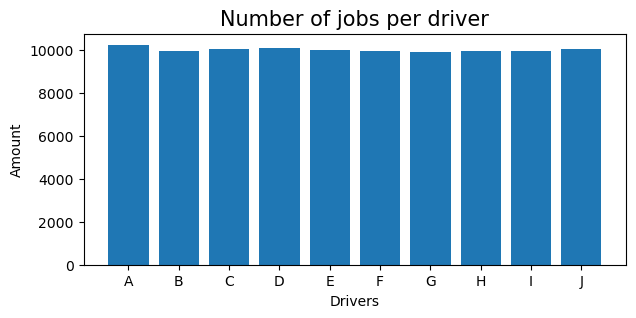

In [8]:
# count each drivers routes (each route is one job)
driver_jobs = [driver['driver'] for driver in actual_routes]
drivers_count_list = [driver_jobs.count(driver) for driver in drivers]
drivers_count_dict = {drivers[driver]: drivers_count_list[driver] for driver in range(len(drivers))}

#display(drivers_count_dict)
for driver in drivers: print('driver_{}: {}'.format(driver, drivers_count_dict[driver]))

# plot
plt.figure(figsize=(7, 3))
plt.bar(drivers_count_dict.keys(), drivers_count_dict.values())
plt.xlabel('Drivers')
plt.ylabel('Amount')
plt.title('Number of jobs per driver', size=15)
plt.show()

In [9]:
#sys.exit()

### **Create Json-files** ###

In [10]:
# select current working directory and subfolder to save the files
current_directory = os.getcwd()
subfolder_path = 'data'

if (len(standardroutes) == 20):  appendix=str(20) #20 standardroutes and 200000 actual routes
elif (len(standardroutes) == 100) and (number_of_actual_routes == 100000): appendix=str(100) #100 standardroutes and 200000 actual routes
else: appendix = ''

file_names = ['standard' + appendix + '.json', 'actual' + appendix + '.json']
files = [standardroutes, actual_routes]

for i in range(2):
    file_path = os.path.join(current_directory, subfolder_path, file_names[i])

    with open(file_path, 'w') as file:
        json.dump(files[i], file) #yaml.dump(files[i], file)

print(f"Json files '{file_names[0]}' and '{file_names[1]}' have been successfully created.")

Json files 'standard20.json' and 'actual20.json' have been successfully created.


### **Read the Json-files with standardroutes and actual routes** ###

In [11]:
# select file path for standardroutes
file_path = os.path.join(current_directory, subfolder_path, 'standard' + appendix + '.json')
with open(file_path, 'r') as file:
    standardroutes_json = json.load(file) #yaml.safe_load(file)

# select file path for actual routes
file_path = os.path.join(current_directory, subfolder_path, 'actual' + appendix + '.json')
with open(file_path, 'r') as file:
    actual_routes_json = json.load(file)

print('Number of actual routes:', len(actual_routes_json))

Number of actual routes: 100000


In [12]:
# get all actual routes of one standardroute
route_id = 's6'
x = [route for route in actual_routes_json if route['sroute'] == route_id]

# get all actual routes of one driver
driver = 'A'
x = [route for route in actual_routes_json if route['driver'] == driver]

### **Save all the necessary parameters to create the routes for the evaluation part in a .json file** ###

In [13]:
# create the dictionary with the parameters
parameter_dictionary = {'cities': cities,
                        'products': products,
                        'min_quantity': min_quantity,
                        'max_quantity': max_quantity,
                        'quantities': [int(i) for i in quantities],
                        'min_length': min_length,
                        'max_length': max_length,
                        'min_products': min_products,
                        'max_products': max_products,
                        'drivers': drivers, 
                        'df_drivers_attributes': df_drivers_attributes.to_dict(),   #turn DF into dictionary for .json format
                        'driver_products': driver_products, 
                        'driver_cities': driver_cities,
                        'min_l': min_l, 
                        'max_l': max_l, 
                        'min_p': min_p, 
                        'max_p': max_p, 
                        'min_q': min_q, 
                        'max_q': min_q, 
                        'q_threshold': q_threshold,
                        'random_p': random_p,
                        'extra_random_p': extra_random_p}

In [14]:
# select current working directory and subfolder to save the file
current_directory = os.getcwd()
subfolder_path = 'data'

file_name = 'parameter_dictionary.json'
files = parameter_dictionary

file_path = os.path.join(current_directory, subfolder_path, file_name)

with open(file_path, 'w') as file:
    json.dump(parameter_dictionary, file)

print(f"Json file '{file_name}' have been successfully created.")

Json file 'parameter_dictionary.json' have been successfully created.


### **Syntax of standardroutes and actual routes** ###

In [15]:
### STANDARDROUTES ###

# [
# 	{id:s5, route:[
# 		{from:‘Rome’, to:‘Milan’, merchandise: {milk:3, pens:10, butter:20}},
# {from:‘Milan’, to:‘Verona’, merchandise: {milk:5, honey:9, butter:10, tomatoes:20}}, 
# {from:‘Verona’, to:‘Venezia’, merchandise:{butter:7, pens:2, tomatoes:10}}
# ]
# }, 

# {id:s10, route:[
# 		{from:‘Rome’, to:‘Milan’, merchandise: {milk:2, pens:10, butter:20}},
# {from:‘Milan’, to:‘Verona’, merchandise: {milk:5, tomatoes:24}}, 
# {from:‘Verona’, to:‘Venezia’, merchandise:{butter:7, bread:2, tomatoes:10}}
# ]
# },

# ]

In [16]:
### ACTUAL ROUTES ###

# [
# {id:a25, driver:C, sroute:s5, route:[
# {from:‘Rome’, to:‘Milan’, merchandise: {milk:4, pens:4, butter:20}},
# {from:‘Milan’, to:‘Bergamo’, merchandise: {milk:5, honey:19, butter:10, tomatoes:20}},
# {from:‘Bergamo’, to:‘Venezia’, merchandise:{butter:47, pens:2, tomatoes:1}}
# ]
# },
# {id:a13, driver:E, sroute:s10, route:[
# {from:‘Bolzano’, to:‘Milan’, merchandise: {milk:2, pens:10, butter:22}},
# {from:‘Milan’, to:‘Verona’, merchandise: {milk:15, tomatoes:4}},
# {from:‘Verona’, to:‘Venezia’, merchandise:{butter:7, bread:21, tomatoes:10}}
# ]
# },
# ]